# Plot QAM histogram

This code plots the example ablation margin histogram. This code is based on https://github.com/artorg-unibe-ch/qam 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


In [18]:
cmap = [(213/255.0, 94/255.0, 0/255.0), (236/255.0, 225/255.0, 51/255.0), (2/255.0, 158/255.0, 115/255.0)]

def plot_histogram_surface_distances(margin, output_file, output_vector_format=False):
    """
    Plots and saves the surface distances (traffic-light color schemes) between tumor and ablation.
    :param pat_name: Patient Name
    :param lesion_id: Lesion 1, 2, 3...etc
    :param output_file: Name of the img saved to the disk
    :param distance_map: Array containing all the surface distances computed.
    :param title: Title of the plot.
    :param print_case_details: True/False to plot an extended title on the image.
    :return: The percentages of non-ablated, insufficiently ablated and completely ablated tumor surface.
    """
    fontsize = 16

    fig, ax = plt.subplots(figsize=(12, 10))
    if len(margin) == 0:
        min_val = -5
        max_val = 15
    else:
        min_val = int(np.floor(min(margin)))
        max_val = int(np.ceil(max(margin)))

    bins = np.arange(min_val, max_val + 1.5, 1)
    col_height, bins, patches = ax.hist(margin, ec='black', align='mid', bins=bins)

    voxels_nonablated = []
    voxels_insuffablated = []
    voxels_ablated = []

    for b, p, col_val in zip(bins, patches, col_height):
        if b < 0:
            voxels_nonablated.append(col_val)
        elif 0 <= b < 5:
            voxels_insuffablated.append(col_val)
        elif b >= 5:
            voxels_ablated.append(col_val)

    num_voxels = np.sum(voxels_ablated) + np.sum(voxels_insuffablated) + np.sum(voxels_nonablated)

    # %% calculate the total percentage of surface for ablated, non-ablated, insufficiently ablated
    voxels_nonablated = np.asarray(voxels_nonablated)
    voxels_insuffablated = np.asarray(voxels_insuffablated)
    voxels_ablated = np.asarray(voxels_ablated)

    sum_perc_nonablated = ((voxels_nonablated / num_voxels) * 100).sum()
    sum_perc_insuffablated = ((voxels_insuffablated / num_voxels) * 100).sum()
    sum_perc_ablated = ((voxels_ablated / num_voxels) * 100).sum()
    # %% iterate through the bins to change the colors of the patches bases on the range [mm]
    for b, p, col_val in zip(bins, patches, col_height):
        if b < 0 and col_val > 0:
            plt.setp(p, 'facecolor', cmap[0],
                     label='Ablation Margin ' + r'$x < 0$' + 'mm :' + " %.2f" % sum_perc_nonablated + '%')
        elif 0 <= b < 5 and col_val > 0:
            plt.setp(p, 'facecolor', cmap[1],
                     label='Ablation Margin ' + r'$0 \leq x < 5$' + 'mm: ' + "%.2f" % sum_perc_insuffablated + '%')
        elif b >= 5 and col_val > 0:
            plt.setp(p, 'facecolor', cmap[2],
                     label='Ablation Margin ' + r'$x \geq 5$' + 'mm: ' + " %.2f" % sum_perc_ablated + '%')
    # %% edit the axes limits and labels
    plt.xlabel('Surface-to-Surface Exact Euclidean Distances (mm)', fontsize=fontsize, color='black')
    plt.tick_params(labelsize=fontsize, color='black')
    ax.tick_params(colors='black', labelsize=fontsize)
    ax.set_xlim([-15, 15])
    # edit the y-ticks: change to percentage of surface
    yticks, locs = plt.yticks()
    percent = (yticks / num_voxels) * 100
    percentage_surface_rounded = np.round(percent)
    yticks_percent = [str(x) + '%' for x in percentage_surface_rounded]
    new_yticks = (percentage_surface_rounded * yticks) / percent
    new_yticks[0] = 0
    plt.yticks(new_yticks, yticks_percent)

    plt.ylabel('Tumor Surface Covered (%)', fontsize=fontsize, color='black')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=fontsize, loc='upper left')
    plt.xticks(fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)
    ax.grid(False)
    
    # save the fig to disk as png and eps
    ax.set_rasterized(True)
    if output_file is not None:
        plt.savefig(output_file, dpi=600, bbox_inches='tight')
        if output_vector_format:
            plt.savefig(output_file + '.svg', dpi=600)
            plt.savefig(output_file + '.eps', dpi=600)

    #plt.close()
    plt.xlim(-5, 15)
    plt.show()

    return sum_perc_nonablated, sum_perc_insuffablated, sum_perc_ablated

In [19]:
margin = np.random.normal(5, 2, 1000)

C:\Users\IWANPA~1\AppData\Local\Temp/ipykernel_18524/1396782313.py:70: RuntimeWarning: invalid value encountered in true_divide
  new_yticks = (percentage_surface_rounded * yticks) / percent


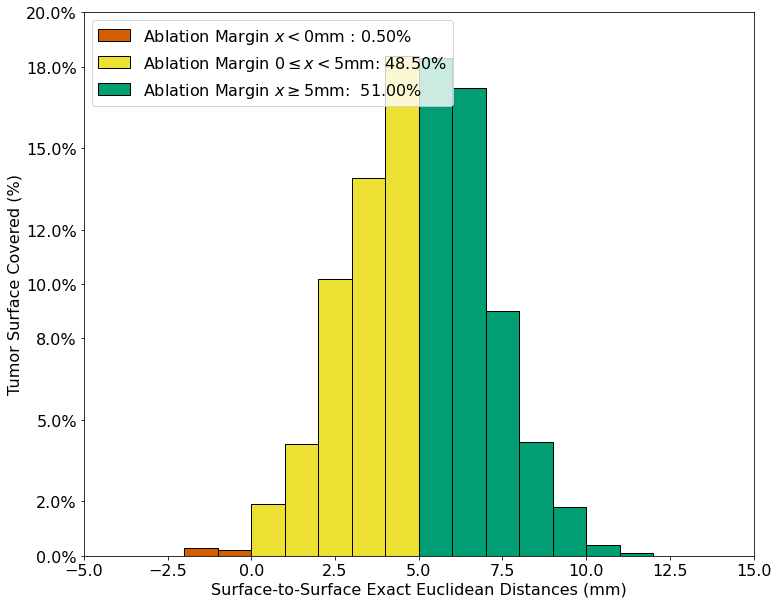

In [21]:
plot_histogram_surface_distances(margin, "plots/out/qam_hist.png", output_vector_format=False);